# Determination coeficient

The coefficient of determination is a number between 0 and 1 that measures how well a statistical model (linear regression) predicts an outcome. 

## Formulas

$R^2 = 1 - \frac{ RSS}{ TSS} $

$ RSS $ - sum of squares or residuals <br>
$ TSS $ - total sum of squares

## Examples

In [1]:
import pandas as pd
import numpy as np
import statistics as s
import math

import matplotlib.pyplot as plt
import matplotlib.collections as matcoll
%matplotlib inline

import seaborn as sns

Let's create simple dummy data for detail explanations how calculate R^2.

In [2]:
data = pd.DataFrame({'x': [1.1, 1.7, 2.5, 4.8, 3.7, 3.5, 1.3], 'y': [4.5, 5.8, 6.7, 12.1, 11.9, 8.8, 3.5]})

Now, let's look at lmplot, to see the model. 

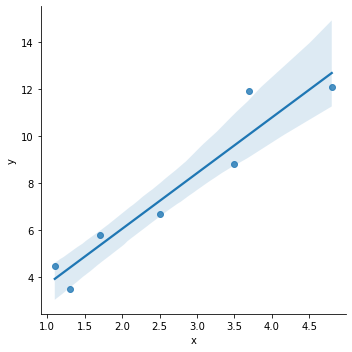

In [3]:
sns.lmplot(data = data, x = 'x', y = 'y')

Ok, let' start to culculate $R^2$. 

## Residual sum of squares (RSS)

$ RSS = \sum _{i=1} ^n {y _i - f(x _i)) ^2}  $ 

$ y _i $ - original value of dependent variable at $i$ observation <br>
$ f(x _i) $ - predicted value

Let's create a model and culculate predictions and find RSS

In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(data['x'].to_frame(), data['y'])

data['y_pred'] =  lm.predict(data['x'].to_frame())

Graphically it looks like that:

Text(0, 0.5, 'y')

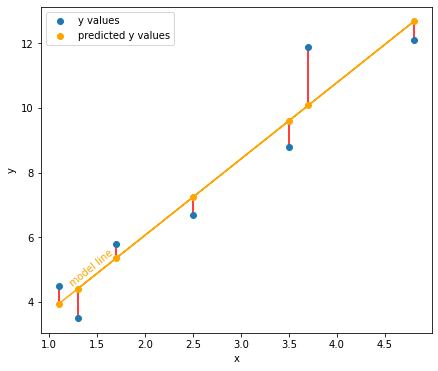

In [5]:
lines = []
for index, row in data.iterrows():
    pair = [(row['x'], row['y']), (row['x'], row['y_pred'])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors='r')

fig, ax = plt.subplots(figsize=(7, 6))
ax.add_collection(linecoll)
ax.plot(data['x'], data['y_pred'],'orange', zorder=2)
ax.scatter(x = 'x', y = 'y', data = data, label = 'y values', zorder=3)
ax.scatter(x = 'x', y = 'y_pred', c = 'orange', label= 'predicted y values', data = data, zorder=4)
ax.text(1.2, 4.5, 'model line', rotation=39, c = 'orange')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

The difference between the predicted value (orange point) and the y value (blue point) is named 'absolute residual' for each observation (red lines on a plot). Let's culculate it.

In [6]:
data['absolute_resid'] = data['y'] - data['y_pred']

Let's get squared residuals.

In [7]:
data['squared_resid'] = data['absolute_resid'] * data['absolute_resid'] 

In [8]:
data

,x,y,y_pred,absolute_resid,squared_resid
0,1.1,4.5,3.936068,0.563932,0.318019
1,1.7,5.8,5.353363,0.446637,0.199485
2,2.5,6.7,7.243089,-0.543089,0.294946
3,4.8,12.1,12.676053,-0.576053,0.331837
4,3.7,11.9,10.077679,1.822321,3.320853
5,3.5,8.8,9.605248,-0.805248,0.648424
6,1.3,3.5,4.408500,-0.908500,0.825372


Now we see that squared residuals are positive. And last step is culculate the sum of 'squared_resid' column.

In [9]:
RSS = sum(data['squared_resid'])
RSS

5.938935698447895

## Total sum of squares

$ TSS = \sum _{i=1} ^n {(y _i - \hat{y})^2}$

$ y _i $ - original value of dependent variable at $i$ observation <br>
$ \hat{y} $ - mean value of dependent variable

In [10]:
y_mean = s.mean(data['y'])
y_mean

7.614285714285715

In [11]:
data['diff_to_mean'] = data['y'] - y_mean

Let's visualise it. 

Text(0, 0.5, 'y')

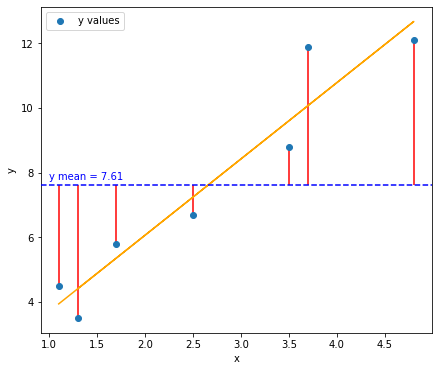

In [12]:
lines = []
for index, row in data.iterrows():
    pair = [(row['x'], row['y']), (row['x'], y_mean)]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors='r')

fig, ax = plt.subplots(figsize=(7, 6))
ax.add_collection(linecoll)
ax.scatter(x = 'x', y = 'y', data = data, label = 'y values', zorder=2)
ax.plot(data['x'], data['y_pred'],'orange', zorder=3)
ax.axhline(y = y_mean, color = 'b', linestyle = '--', zorder=4)
ax.text(x = 1.0, y = 7.8, s = 'y mean = ' + str(float(f'{y_mean:.2f}')), fontsize=10, c = 'b')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

In [13]:
data['squares'] = data['diff_to_mean'] * data['diff_to_mean'] 

In [14]:
data

,x,y,y_pred,absolute_resid,squared_resid,diff_to_mean,squares
0,1.1,4.5,3.936068,0.563932,0.318019,-3.114286,9.698776
1,1.7,5.8,5.353363,0.446637,0.199485,-1.814286,3.291633
2,2.5,6.7,7.243089,-0.543089,0.294946,-0.914286,0.835918
3,4.8,12.1,12.676053,-0.576053,0.331837,4.485714,20.121633
4,3.7,11.9,10.077679,1.822321,3.320853,4.285714,18.367347
5,3.5,8.8,9.605248,-0.805248,0.648424,1.185714,1.405918
6,1.3,3.5,4.408500,-0.908500,0.825372,-4.114286,16.927347


In [15]:
TSS = sum(data['squares'])
TSS

70.64857142857143

Now, we know $RSS$ and $TSS$ we are ready to culculate $R ^2$.

In [16]:
r_squared = 1 - RSS/TSS
r_squared

0.9159369315138608

Let's compare our result with buildin function. 

In [17]:
import sklearn.metrics as metrics

r2=metrics.r2_score(data['y'], data['y_pred'])
print('r2: ', r2)

r2:  0.9159369315138608


Perfect, now we know how the **Coeficient of determination** works! <br>
Thanks everybody!